## Çoklu Lineer Regresyon Proje - Advertising

Advertising.csv datasında;

TV - Radio - Newspaper - Sales arasındaki ilişkiye bakacağız.

Amacımız TV - Radio - Newspaper bütçesi ile Satış arasındaki ilişkiyi Lineer Regresyon ile modellemek.

Bunun için bir lineer model kuracağız.

Adımlar:

1- Önce Datayı ham olarak inceleyelim

2- Datayı import edelim

3- Datayı inceleyelim (head, describe, info)

4- Datayı görselleştir

5- Modeli oluştur (formuller)

6- Hazırlık

7- Train-Test Split

8- Çoklu Lineer Regresyon Modelini Çalıştır (Fit)

9- Katsayıları incele (intercept_, coef_)

10- Tahmin Yap (Predict)

11- Gerçek Data ve Tahmin Datasını Çiz

12- Hataları Çiz ($y - \hat y$)

13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

14- OLS - p-değerini incele

15- Korelasyon

16- Sonuçlara göre tekrar Model oluştur

#### 1- Önce Datayı ham olarak inceleyelim

Datayı manuel kontrol:
* Sütunlar hangileri
* Feature (X) ve Label sütunu ne
* Toplam kaç kayıt var
* Eksik data var mı
    * NA (Not Available)
    * NaN: Not a Number

#### 2- Datayı import edelim

In [1]:
# paket import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataframe'i oluştur

df = pd.read_csv('data/Advertising.csv', index_col=0)

#### 3- Datayı inceleyelim (head, describe, info)

In [5]:
# ilk 5 satır

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
# son 5 satır

df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
# genel bilgiler

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
# temel istatistikler

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### 4- Datayı görselleştir

Exploratory Data Analysis (EDA)

https://seaborn.pydata.org/generated/seaborn.pairplot.html

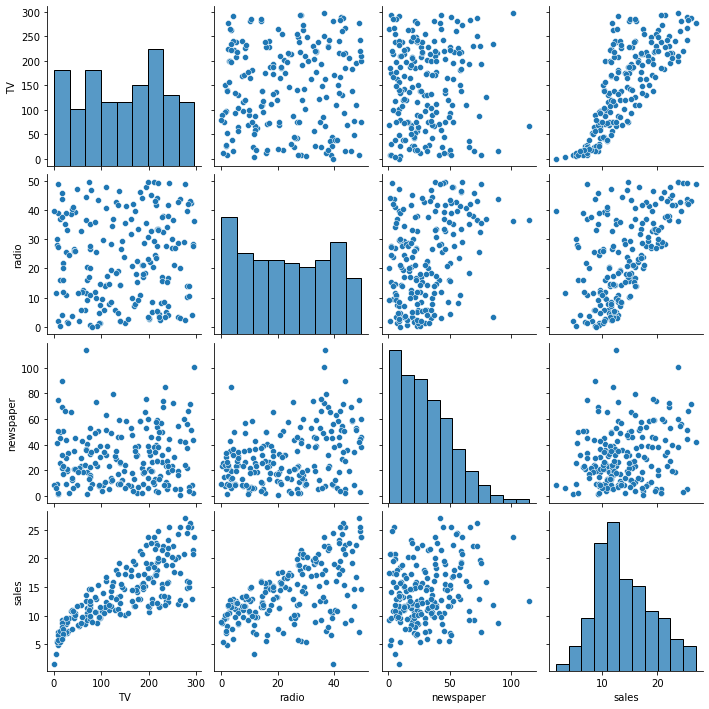

In [9]:
# pairplot -> ikili

sns.pairplot(df)

In [33]:
# inputlar

X = df[['TV', 'radio', 'newspaper']]
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [36]:
# output

y = df['sales']
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [35]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

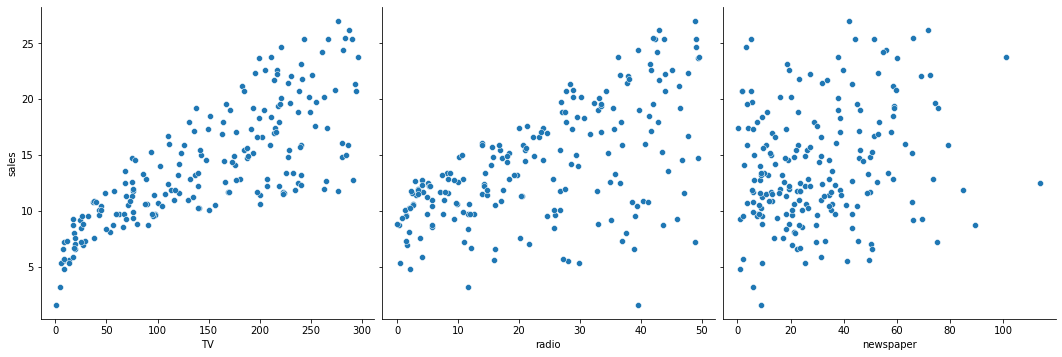

In [37]:
# sadece girdiler -> çıktı ikilisi

sns.pairplot(df, x_vars=df.columns[:3], y_vars=df.columns[3], height=5)

#### 5- Modeli oluştur

$$ y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 $$

In [38]:
# sklearn LinearRegression

from sklearn.linear_model import LinearRegression

In [39]:
# lineer regresyon nesnesini yarat

lr = LinearRegression()

#### 6- Hazırlık

Boyut kontrolü yapmamız lazım.

shape -> `(n_samples, n_features)`

shape -> `(n, p)`

In [40]:
# önce input'un ve output'un boyutuna bakalım

print("X'in boyutu:", X.shape)
print("y'in boyutu:", y.shape)

X'in boyutu: (200, 3)
y'in boyutu: (200,)


Gördüğünüz gibi şekli sklearn'ün LinearRegression classının istediği gibi değil.

In [41]:
# y'yi yeniden boyutlandırmamız lazım
# (200, 1) şeklinde

y = y.values.reshape(-1, 1)

In [42]:
# y'in yeni boyutu

print("y'in boyutu:", y.shape)

y'in boyutu: (200, 1)


#### 7- Train-Test Split

Toplam 200 verimizi Train-Test olarak ikiye ayıracağız.

Train: %70

Test: %30

Train Data: X_train, y_train

Test Data: X_test, y_test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [43]:
# scikit-learn'den import

from sklearn.model_selection import train_test_split

In [44]:
# train data
# X_train, y_train

# test_data
# X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [45]:
# şekiller

print("X_train'in boyutu:", X_train.shape)
print("y_train'in boyutu:", y_train.shape)

print("X_test'in boyutu:", X_test.shape)
print("y_test'in boyutu:", y_test.shape)

X_train'in boyutu: (140, 3)
y_train'in boyutu: (140, 1)
X_test'in boyutu: (60, 3)
y_test'in boyutu: (60, 1)


#### 8- Lineer Regresyon Modelini Çalıştır (Fit)

In [47]:
# regresyonu çalıştır -> fit
# fit -> öğrenme
# train data üzerinden

lr.fit(X_train, y_train)

LinearRegression()

#### 9- Katsayıları Hesaplama (intercept_, coef_)

Lineer Regresyonu fit etmenin amacı katsayıları hesaplamaktır.

$\beta_0$ -> intercept

$\beta_1 \beta_2 \beta_3$ -> slope (coefficient)

In [48]:
# intercept -> beta 0

print('intercept:', lr.intercept_)

intercept: [2.65278967]


In [50]:
# slope = coefficient -> beta 1, beta 2, beta 3

print('slope (coeffificent) eğim:', lr.coef_)

slope (coeffificent) eğim: [[0.0454256  0.18975773 0.00460308]]


In [56]:
katsayilar = pd.DataFrame(lr.coef_, columns = ['beta_1 (TV)', 'beta_2 (Radio)', 'beta_3 (Newspaper)'])
katsayilar

,beta_1 (TV),beta_2 (Radio),beta_3 (Newspaper)
0,0.045426,0.189758,0.004603


$$ y = 2.652 + 0.0454 * TV + 0.1897 * Radio + 0.0046 * Newspaper $$

#### 10- Tahmin Yap (Predict)

Artık regresyon katsayılarımızı hesapladığımıza göre, test datası (X_test) üzerinden y'leri tahmin edebiliriz.

`y_pred`

Gerçek y'ler y_test olarak duruyor.

Onları tahminimizin doğruluğunu kontrol ederken kullanacağız. 

In [57]:
# tahmin yap

y_pred = lr.predict(X_test)

In [59]:
# tahmini yazdır

y_pred

array([[10.62160072],
       [20.00625302],
       [16.91850882],
       [19.17040746],
       [20.94974131],
       [13.12284284],
       [11.80740696],
       [12.32019766],
       [20.57806782],
       [20.95662688],
       [10.79096475],
       [19.54868702],
       [ 6.42403866],
       [15.23133391],
       [ 8.97226257],
       [ 7.89897862],
       [16.23599497],
       [12.02636477],
       [17.09702178],
       [11.26080277],
       [16.97826292],
       [ 9.75655721],
       [20.82389762],
       [17.20916742],
       [15.13816239],
       [21.97290698],
       [19.20181841],
       [10.07501899],
       [19.39017185],
       [14.8673761 ],
       [14.36798893],
       [ 7.55604543],
       [ 9.96742165],
       [14.76342565],
       [ 7.20995576],
       [13.60003295],
       [ 7.49088656],
       [11.70865932],
       [13.46091883],
       [15.2229793 ],
       [17.18088277],
       [13.56738329],
       [14.30942267],
       [13.72909849],
       [11.88559349],
       [ 8

In [61]:
# tahmin datasının şekli

y_pred.shape

(60, 1)

In [62]:
# test datasının (orjinal data) şekli
# y_true

y_test.shape

(60, 1)

#### 11- Gerçek Data ve Tahmin Datasını Çiz

Artık test datadan yani gerçek dünyadan bahsediyoruz.

Train ile işimiz bitti. Yani öğrendik.

Gerçek Label -> y_test

Tahmin Label -> y_pred

Input -> X_test

In [64]:
# ilk 10 gerçek y değerini görelim

y_test[0:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [65]:
# ilk 10 tahmin değerini görelim

y_pred[0:10]

array([[10.62160072],
       [20.00625302],
       [16.91850882],
       [19.17040746],
       [20.94974131],
       [13.12284284],
       [11.80740696],
       [12.32019766],
       [20.57806782],
       [20.95662688]])

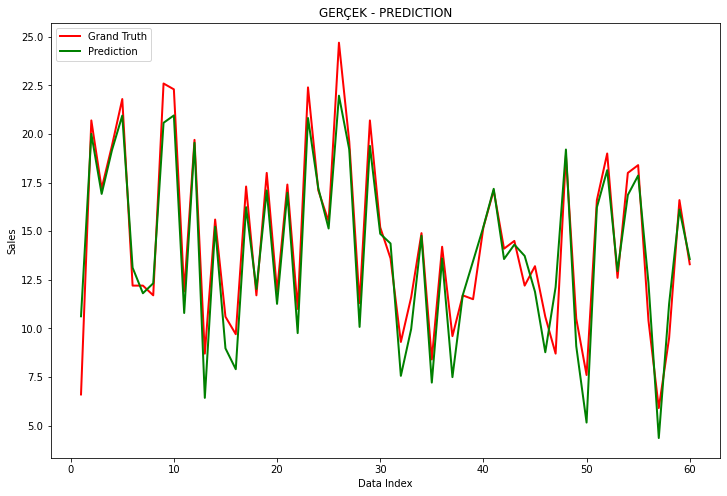

In [66]:
# Her bir tahmin noktasındaki değişimi görelim
indexler = range(1,61)

# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label='Grand Truth', color='red', linewidth=2)

# Tahmin -> Prediction
ax.plot(indexler, y_pred, label='Prediction', color='green', linewidth=2)

plt.title('GERÇEK - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#### 12- Hataları Çiz ($y - \hat y$)

Hata : Residual -> ($y - \hat y$)

**y_test - y_pred**

In [67]:
import numpy as np

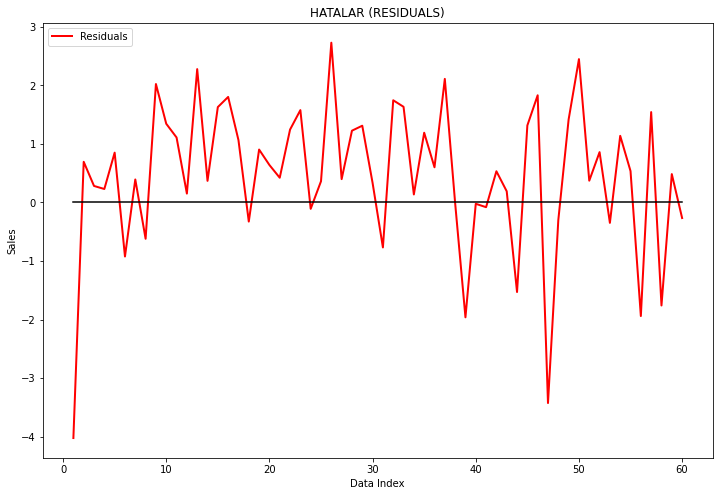

In [68]:
# Her bir tahmin noktasındaki hatayı görelim
indexler = range(1,61)

# Residuls -> Hatalar
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label='Residuals', color='red', linewidth=2)

# sıfır doğrusunu çiz
ax.plot(indexler, np.zeros(60), color='black')

plt.title('HATALAR (RESIDUALS)')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#### 13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

**RMSE**: Root Mean Squared Error

Daha önce gördüğümüz MSE'nin karekökü aslında.

$R^2$: `coefficient of determination`.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [69]:
# sklearn import

from sklearn.metrics import r2_score, mean_squared_error

In [70]:
# R^2 yi hesaplayalım

r_2 = r2_score(y_test, y_pred)

In [71]:
# R^2 yazdır

print('R^2:', r_2)

R^2: 0.9058622107532245


In [72]:
# R^2 % olarak yazdır

print('R^2 %:', r_2 * 100)

R^2 %: 90.58622107532244


In [73]:
# MSE -> RMSE

mse = mean_squared_error(y_test, y_pred)

In [74]:
# MSE'yi yazdır

print('MSE:', mse)

MSE: 1.8506819941636972


In [75]:
# RMSE

import math
rmse = math.sqrt(mse)

In [76]:
# RMSE'yi yazdır

print('RMSE:', rmse)

RMSE: 1.3603977338130555


### 14- OLS

In [77]:
import statsmodels.api as sm

https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [78]:
# statsmodels ile OLS (Ordinary Least Squares) çalıştır
# statsmodels ols fonksiyonu beta_0 için otomatik değer atamaz
# o yüzden beta_0 için 1 katsayısını bizim eklememiz lazım

X_train_ols = sm.add_constant(X_train)

In [79]:
X_train

,TV,radio,newspaper
75,213.4,24.6,13.1
4,151.5,41.3,58.5
186,205.0,45.1,19.6
27,142.9,29.3,12.6
91,134.3,4.9,9.3
...,...,...,...
88,110.7,40.6,63.2
104,187.9,17.2,17.9
68,139.3,14.5,10.2
25,62.3,12.6,18.3


In [80]:
X_train_ols

,const,TV,radio,newspaper
75,1.0,213.4,24.6,13.1
4,1.0,151.5,41.3,58.5
186,1.0,205.0,45.1,19.6
27,1.0,142.9,29.3,12.6
91,1.0,134.3,4.9,9.3
...,...,...,...,...
88,1.0,110.7,40.6,63.2
104,1.0,187.9,17.2,17.9
68,1.0,139.3,14.5,10.2
25,1.0,62.3,12.6,18.3


In [81]:
# statsmodels OLS modeli oluştur

sm_model = sm.OLS(y_train, X_train_ols)

In [82]:
# OLS modelinin sonuçlarını al

sonuc = sm_model.fit()

In [83]:
# OLS Özet tablosunu yazdır

print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           9.97e-66
Time:                        17:37:55   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

**OLS Sonucu:**

newspaper'ın p-değeri 0.05'ten büyük olduğu için bu değişkenin sonuç üzerinde bir etkisi yok.

newspaper sütununu çıkaracağız.

#### 15- Korelasyon (Correlation)

<AxesSubplot:>

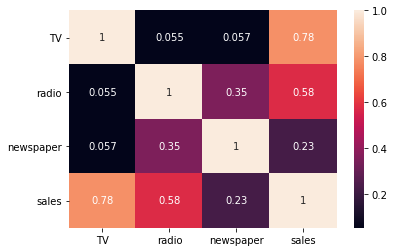

In [84]:
sns.heatmap(df.corr(), annot=True)

---

#### 16- Sonuçlara göre tekrar Model oluştur

Newspaper kolonu önemsiz olduğuna göre, onu çıkarıp tekrar model oluşturalım:

In [86]:
# yeni feature matrisi
# X_train_yeni
# X_test_yeni

X_train_yeni = X_train[['TV', 'radio']]
X_train_yeni.head()

,TV,radio
75,213.4,24.6
4,151.5,41.3
186,205.0,45.1
27,142.9,29.3
91,134.3,4.9


In [87]:
X_test_yeni = X_test[['TV', 'radio']]
X_test_yeni.head()

,TV,radio
127,7.8,38.9
105,238.2,34.3
100,135.2,41.7
93,217.7,33.5
112,241.7,38.0


In [88]:
# modeli tekrar kurgula

lr.fit(X_train_yeni, y_train)

LinearRegression()

In [89]:
# yeni tahminleri al

y_pred_yeni = lr.predict(X_test_yeni)

In [90]:
# yeni tahminler

y_pred_yeni

array([[10.56198847],
       [20.16735504],
       [16.90186462],
       [19.07993718],
       [21.03892699],
       [13.13621118],
       [11.80982028],
       [12.39007729],
       [20.59914742],
       [21.04083466],
       [10.88508869],
       [19.38624121],
       [ 6.37517955],
       [15.33164571],
       [ 8.96088175],
       [ 7.95144449],
       [16.38791571],
       [11.97017124],
       [17.24725749],
       [11.20901475],
       [17.11470022],
       [ 9.70819803],
       [20.79788275],
       [17.20749366],
       [15.18035107],
       [22.18189008],
       [19.17555656],
       [10.05518823],
       [19.5883307 ],
       [14.98424867],
       [14.39922454],
       [ 7.65095995],
       [ 9.84543862],
       [14.78150095],
       [ 7.22855505],
       [13.69168479],
       [ 7.43358375],
       [11.75347003],
       [13.50004784],
       [15.057806  ],
       [17.06957807],
       [13.68351323],
       [14.23222825],
       [13.70744537],
       [11.96487996],
       [ 8

In [92]:
# yeni OLS'i gör

X_train_yeni_ols = sm.add_constant(X_train_yeni)

In [93]:
# statsmodels OLS modeli oluştur

sm_model = sm.OLS(y_train, X_train_yeni_ols)

In [94]:
# OLS modelinin sonuçlarını al

sonuc = sm_model.fit()

In [95]:
# OLS Özet tablosunu yazdır

print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           4.46e-67
Time:                        18:04:36   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

Şu anda iki değişkenimiz de (TV, radio) önemli (significant).

Çünkü p-değerleri 0.05'ten küçük.

**Backward Elimination**

Eğer böyle değil de, herhangi birinin p-değeri 0.05'ten büyük olsaydı, 

Onu da çıkarıp tekrar bir LineerRegression çalışıtıracaktık.

Bu döngü bu şekilde devam eder.

Ta ki, tüm değişkenler önemli olarak kalana kadar.

---

### İSPAT - Gerçekten Newspaper Önemsiz mi?

In [98]:
# input -> feature (X)
X = df['newspaper']

# output
y = df['sales']

# yeniden boyutlandırmamız lazım
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# statsmodels OLS
X_train_ols = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_ols)
result = model.fit()

# OLS Özet tablosunu yazdır
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.65
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           0.000195
Time:                        18:13:14   Log-Likelihood:                -430.09
No. Observations:                 140   AIC:                             864.2
Df Residuals:                     138   BIC:                             870.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4844      0.763     15.052      0.0

#### Gördüğünüz gibi $R^2 = 0.096$ (%9.6) olarak çıktı.

Yani çok düşük.

Dolayısı ile newspaper'in gerçekten bir tahmin değeri yok.

---

**Adjustes R-Square**:

Multiple Lineer Regresyon Yöntemlerinde, Backward Selection'ı bir örnekle gördük.

Başka bir çözüm yolu ise Forward Selection'dır.

Forward Selection'da, belli bir sayıda değişken ile başlanır ve her seferinde yeni bir değişken eklenerek ilerlenir.

Her yeni değişken demek biraz daha iyileşmesi demek tahminin (en kötü ihtimalle aynı kalır.)

İşte biraz daha iyileşme demek $R^2$ nin artması demek.

Ama bu artma yanıltıcı olabilir. Sırf bir değişken eklediğimiz için $R^2$ nin artması çok doğru olmaz.

Bunu egale etmek için **Adjusted** $R^2$ vardır.

Dolayısı ile Multiple Lineer Regression analizlerinde, Adjusted $R^2$ daha güvenilir olarak kabul edilir.